In [1]:
import pandas as pd, numpy as np
import os, glob

#os.chdir("C:/Users/jstelman/Git/chelsvig_urban_pesticides/src/")
os.chdir("C:/Git/chelsvig_urban_pesticides/src/")
from path_names import *
vvwm_path = os.path.join(os.path.abspath("../.."),"vvwm")
print(vvwm_path)

obs_path = os.path.join(main_path, "observed_data", "SURF_water_placer_bifenthrin.csv")
print(obs_path)

outfalls = ['outfall_31_26', 'outfall_31_28', 'outfall_31_29', 'outfall_31_35', 
            'outfall_31_36', 'outfall_31_38', 'outfall_31_42']

def output_path(of, i):
    op_path = os.path.join(vvwm_path, of, ("input_" + str(i)), "output_NPlesant_Custom_parent_daily.csv")
    return(op_path)

main_path   C:\Git\chelsvig_urban_pesticides
dir_path    C:\Git\chelsvig_urban_pesticides\probabilistic_python
exe_path    C:\Git\chelsvig_urban_pesticides\probabilistic_python\exe
swmm_path   C:\Git\chelsvig_urban_pesticides\probabilistic_python\input\swmm
inp_path    C:\Git\chelsvig_urban_pesticides\probabilistic_python\input\swmm\NPlesantCreek.inp
bin_path    C:\Git\chelsvig_urban_pesticides\probabilistic_python\input\swmm\NPlesantCreek.out
vvwm_path   C:\Git\chelsvig_urban_pesticides\probabilistic_python\input\vvwm
wet_path    C:\Git\chelsvig_urban_pesticides\probabilistic_python\weather
C:\Git\vvwm
C:\Git\chelsvig_urban_pesticides\observed_data\SURF_water_placer_bifenthrin.csv


In [2]:
# Import Observed Data
obs_data = pd.read_csv(obs_path, usecols=["Concentration..ppb.","Level_of_quantification..ppb.",
                                         "Method_detection_level..ppb.", "Sample_date", "Site_code"],
                      parse_dates=["Sample_date"])

# do Proxy
for idx, row in obs_data[obs_data['Concentration..ppb.']==0].iterrows():
    obs_data.loc[idx,'Concentration..ppb.'] = min([row['Level_of_quantification..ppb.'],
                                                   row['Method_detection_level..ppb.']])/2

# drop columns
obs_data = obs_data.drop(labels = ["Level_of_quantification..ppb.","Method_detection_level..ppb."], axis = 1)
obs_data.head()

,Concentration..ppb.,Sample_date,Site_code
0,0.00235,2015-06-08,31_26
1,0.00235,2010-06-24,31_44
2,0.00235,2009-05-06,31_44
3,0.00235,2010-09-03,31_44
4,0.00035,2016-10-14,31_26


## For 112 simulations

In [3]:
inputs = [os.path.basename(name) for name in glob.glob(os.path.join(vvwm_path, "outfall_31_26", "input_*"))]
def output_path2(of, ip):
    op_path = os.path.join(vvwm_path, of, ip, "output_NPlesant_Custom_parent_daily.csv")
    return(op_path)

In [4]:
# Now do this as a loop for simulations 1-n, and save their n NSEs
NSEs = []

for i in inputs:
    
    sim1_of26_data = pd.read_csv(output_path2("outfall_31_26", i), usecols = [1], skiprows=5, names = ["davg_bif_conc"])*1000000
    sim1_of26_data['Sample_date'] = pd.date_range(start='1/1/2009', periods=3287, freq='D')
    sim1_of26_data['Site_code'] = '31_26'
    
    comp_data_ipi = sim1_of26_data.merge(obs_data, how = "inner", on = ['Sample_date','Site_code'])
    
    for of in outfalls[1:]:
        dat = pd.read_csv(output_path2(of, i), usecols = [1], skiprows=5, names = ["davg_bif_conc"])*1000000
        dat['Sample_date'] = pd.date_range(start='1/1/2009', periods=3287, freq='D')
        dat['Site_code'] = of[-5:]
        comp_data_ipi = comp_data_ipi.append(dat.merge(obs_data, how = "inner", on = ['Sample_date','Site_code']), ignore_index=True)
        
    NSEi = 1 - ((sum(comp_data_ipi['davg_bif_conc'] - comp_data_ipi['Concentration..ppb.'])**2)/
                (sum(comp_data_ipi['Concentration..ppb.'] - sum(comp_data_ipi['Concentration..ppb.'])/
                     len(comp_data_ipi['Concentration..ppb.']))**2))
    NSEs.append(NSEi)

In [5]:
NSEs
# Wow, these are all terrrrible

[-4.066021452443556e+54,
 -3.8599171755554547e+55,
 -2.206865728774752e+55,
 -2.2277674345547663e+55,
 -2.805538927482503e+54,
 -3.114161955127447e+54,
 -2.3069616075356395e+55,
 -2.9590266780416298e+54,
 -5.06800584567615e+54,
 -3.844067985368535e+54,
 -1.6847766751798336e+54,
 -7.978032285166373e+54,
 -1.8163983425407886e+55,
 -7.285010369869462e+54,
 -7.60846173096257e+54,
 -1.5446682050824052e+55,
 -1.0603705802402675e+55,
 -1.482395214375138e+55,
 -2.8490193639871263e+55,
 -3.4291274237991697e+55,
 -2.880486167015523e+55,
 -3.6680463343217095e+55,
 -2.2470001060234823e+55,
 -2.3895474501135302e+55,
 -7.020247123497176e+54,
 -6.560355149031143e+55,
 -9.993974439664223e+54,
 -2.478859552288944e+55,
 -2.389485197758379e+55,
 -2.49074600871382e+55,
 -5.49295390944757e+54,
 -1.8077580119808113e+55,
 -3.471613548673933e+54,
 -2.369169900570354e+55,
 -1.3245177930333755e+55,
 -2.7091995670743287e+54,
 -1.5903039872501029e+55,
 -1.5481287591584148e+55,
 -1.4423894379556296e+54,
 -8.744759

### Get LHS data pertaining to "best" NSEs

In [26]:
swmm_df = pd.read_csv(os.path.join(vvwm_path, "lhs_params", "lhs_sampled_params.csv"), index_col=0
                     ).iloc[[int(inputs[i][6:]) - 1 for i in range(len(inputs))]]
vvwm_df = pd.read_csv(os.path.join(vvwm_path, "lhs_params", "lhs_sampled_params_vvwm.csv"), index_col=0
                     ).iloc[[int(inputs[i][6:]) - 1 for i in range(len(inputs))]]

In [34]:
def subset_lhs_data(acc_rate, vvwm = False):
    # how many will be in acceptanct subset?
    if acc_rate == 1:
        n_acc = 0
    elif acc_rate < 1 and acc_rate > 0:
        n_acc = int(np.ceil(len(inputs)*acc_rate))
    else:
        print("acc_rate not in (0,1].")
        return None
    # which ones will they be?
    sbst = [int(inputs[i][6:]) - 1 for i in sorted(range(len(NSEs)), key=lambda i: NSEs[i])[(0-n_acc):]]
    lhsp = vvwm_df if vvwm else swmm_df
    
    # subset and return to just those pertaining to the winners
    subset_lhs = lhsp.loc[sbst]
    return(subset_lhs)

### First the SWMM side

In [35]:
# get params of all of Nash-Sutcliffe Efficiencies, in this case, 28
swmm_df_100 = subset_lhs_data(1.0, False)
# get params of top 25% of Nash-Sutcliffe Efficiencies, in this case, 28
swmm_df_25 = subset_lhs_data(.25, False)
# get params of top 10% of Nash-Sutcliffe Efficiencies, in this case, 12
swmm_df_10 = subset_lhs_data(.1, False)
# get params of top 5% of Nash-Sutcliffe Efficiencies, in this case, 6
swmm_df_05 = subset_lhs_data(.05, False)

### Then the vvwm side

In [36]:
# get details of all of Nash-Sutcliffe Efficiencies, in this case, 28
vvwm_df_100 = subset_lhs_data(1.0, True)
# get details of top 25% of Nash-Sutcliffe Efficiencies, in this case, 28
vvwm_df_25 = subset_lhs_data(.25, True)
# get details of top 10% of Nash-Sutcliffe Efficiencies, in this case, 12
vvwm_df_10 = subset_lhs_data(.1, True)
# get details of top 5% of Nash-Sutcliffe Efficiencies, in this case, 6
vvwm_df_05 = subset_lhs_data(.05, True)

### Merge them

In [37]:
swmm_100 = pd.DataFrame(swmm_df_100.stack()).reset_index(level=[1])
swmm_100.columns = ["param","value"]
swmm_100["acc_rate"] = "100%"

swmm_25 = pd.DataFrame(swmm_df_25.stack()).reset_index(level=[1])
swmm_25.columns = ["param","value"]
swmm_25["acc_rate"] = "25%"

swmm_10 = pd.DataFrame(swmm_df_10.stack()).reset_index(level=[1])
swmm_10.columns = ["param","value"]
swmm_10["acc_rate"] = "10%"

swmm_05 = pd.DataFrame(swmm_df_05.stack()).reset_index(level=[1])
swmm_05.columns = ["param","value"]
swmm_05["acc_rate"] = "5%"

swmm_MULTI = pd.concat([swmm_100, swmm_25, swmm_10, swmm_05])

In [38]:
vvwm_100 = pd.DataFrame(vvwm_df_100.stack()).reset_index(level=[1])
vvwm_100.columns = ["param","value"]
vvwm_100["acc_rate"] = "100%"

vvwm_25 = pd.DataFrame(vvwm_df_25.stack()).reset_index(level=[1])
vvwm_25.columns = ["param","value"]
vvwm_25["acc_rate"] = "25%"

vvwm_10 = pd.DataFrame(vvwm_df_10.stack()).reset_index(level=[1])
vvwm_10.columns = ["param","value"]
vvwm_10["acc_rate"] = "10%"

vvwm_05 = pd.DataFrame(vvwm_df_05.stack()).reset_index(level=[1])
vvwm_05.columns = ["param","value"]
vvwm_05["acc_rate"] = "5%"

vvwm_MULTI = pd.concat([vvwm_100, vvwm_25, vvwm_10, vvwm_05])

In [39]:
sv_MULTI = pd.concat([swmm_MULTI.assign(model = "SWMM"), vvwm_MULTI.assign(model = "VVWM")])

### Plot

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#### Histograms

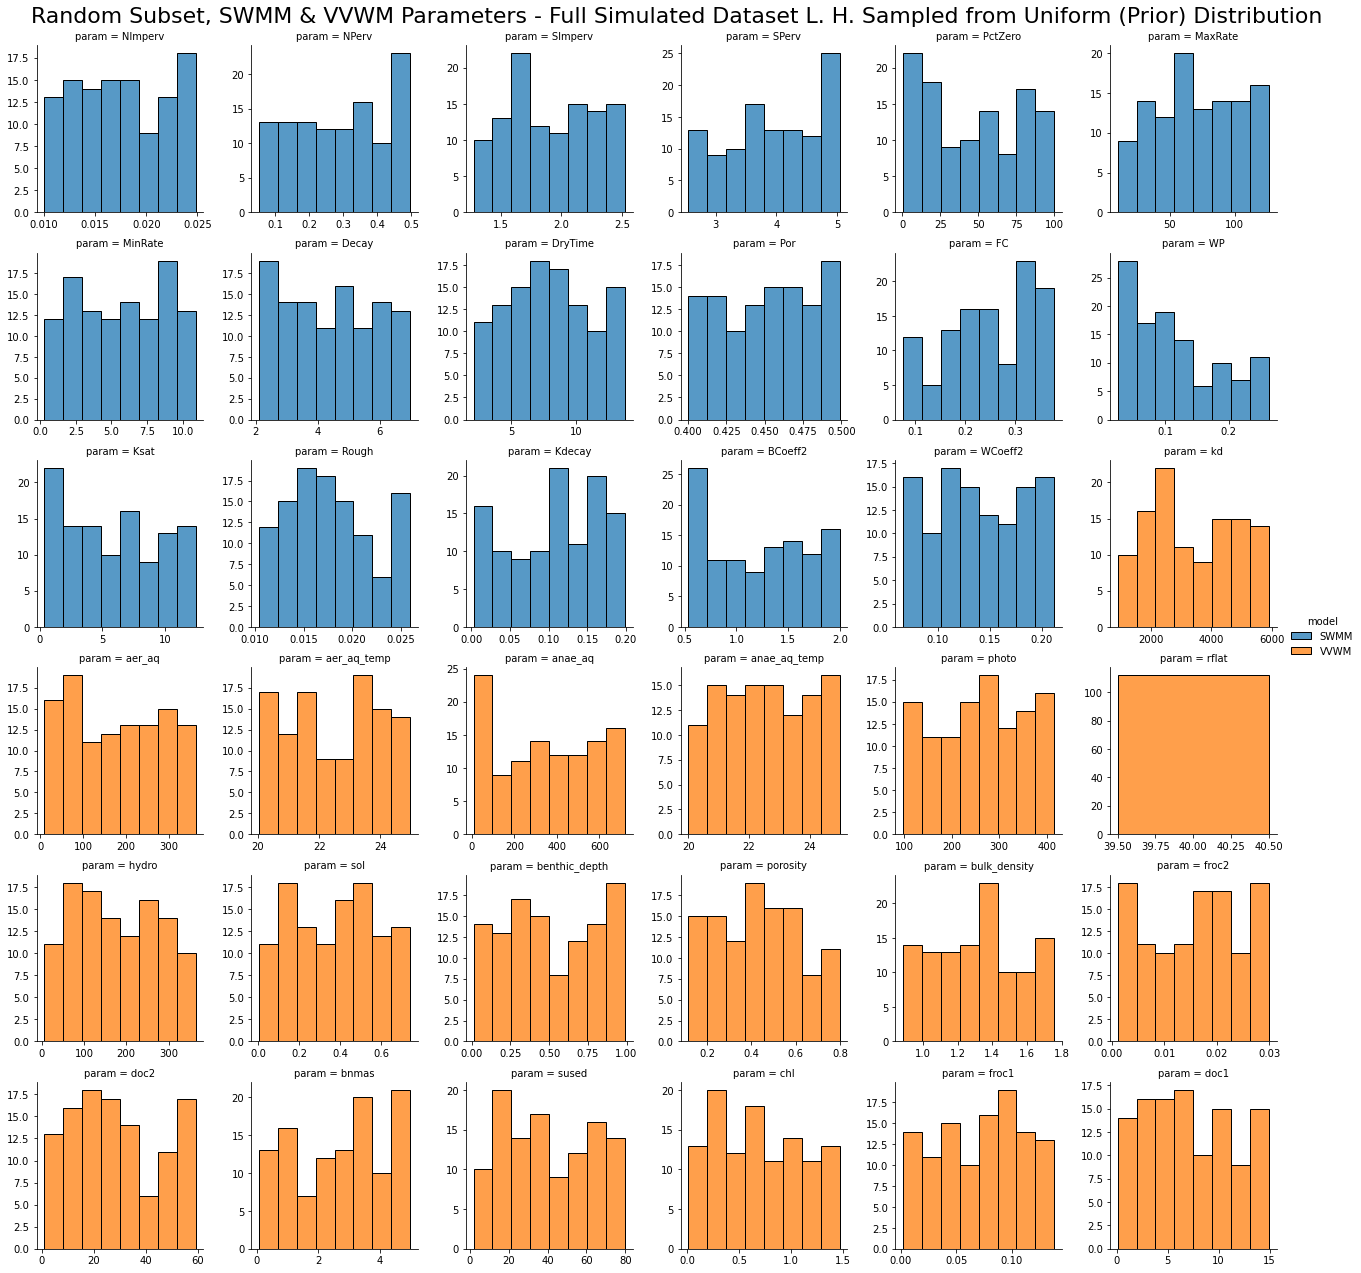

In [41]:
# SWMM & VVWM parameters, all of the Data
g = sns.FacetGrid(pd.concat([swmm_100.assign(model = "SWMM"), vvwm_100.assign(model = "VVWM")]), 
                  col = "param", col_wrap = 6, sharex = False, sharey = False, hue = "model")
g.map_dataframe(sns.histplot, x="value")
g.add_legend()
# source: <https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot>
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Random Subset, SWMM & VVWM Parameters - Full Simulated Dataset L. H. Sampled from Uniform (Prior) Distribution",
              fontsize=22)
None

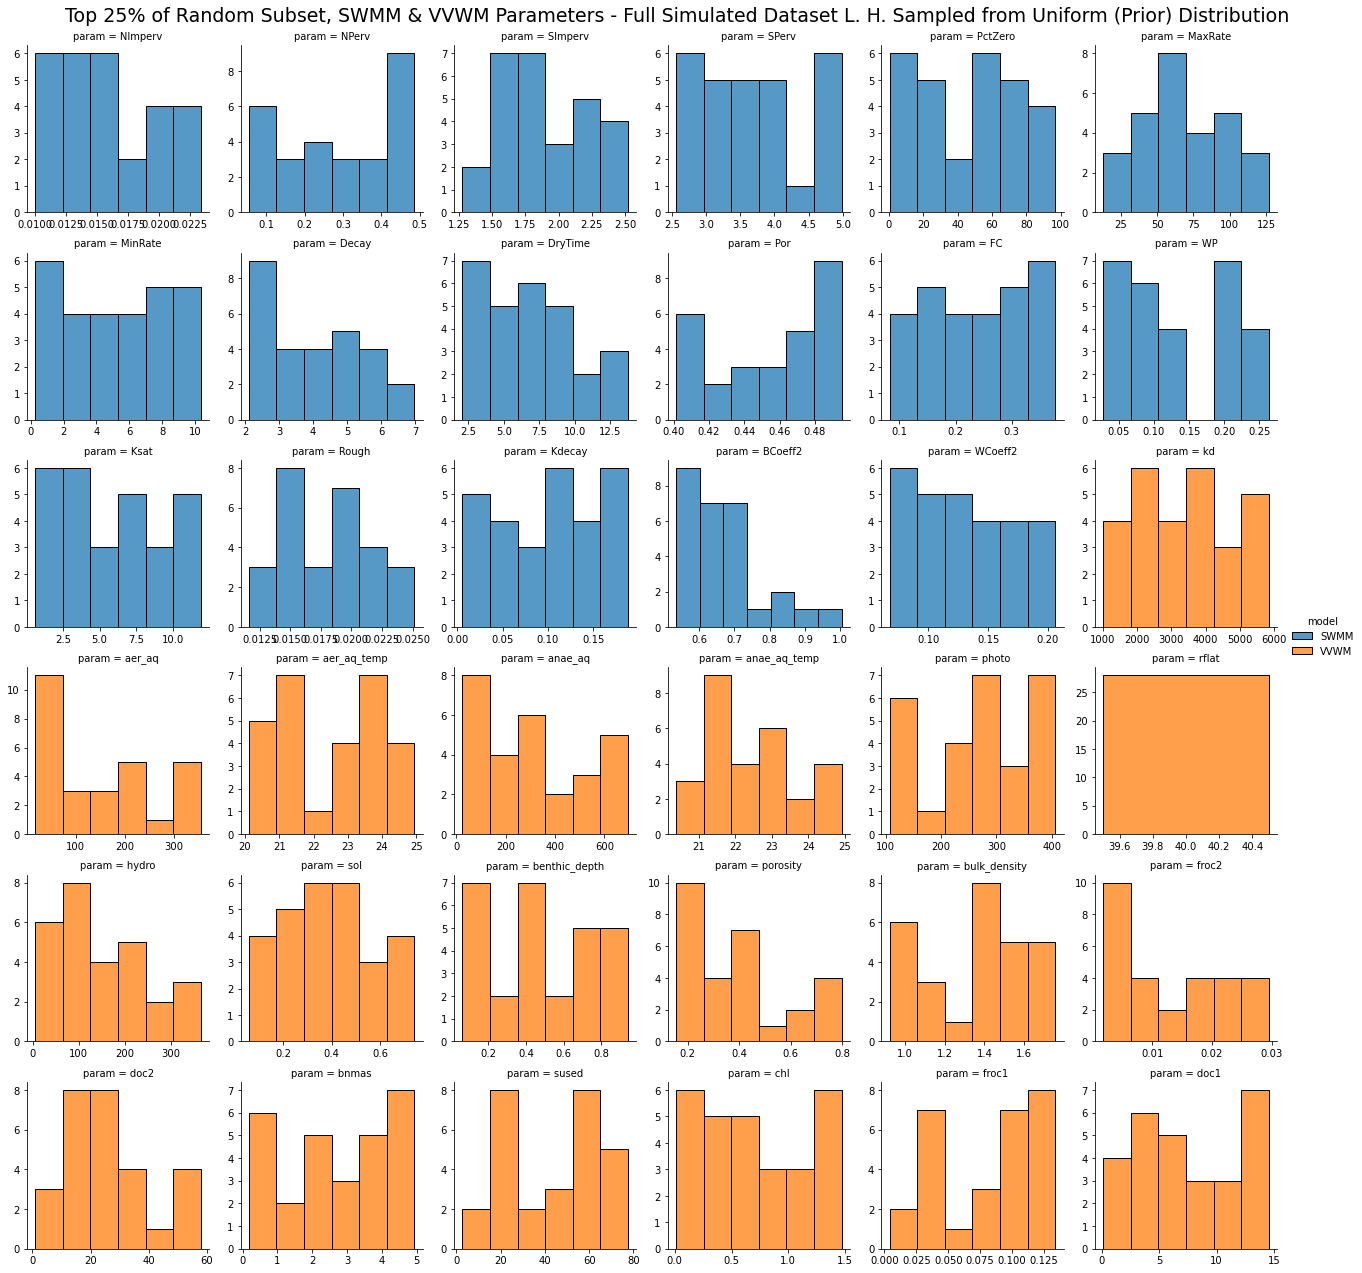

In [42]:
# SWMM & VVWM parameters, top 25% of the Data
g = sns.FacetGrid(pd.concat([swmm_25.assign(model = "SWMM"), vvwm_25.assign(model = "VVWM")]), 
                  col = "param", col_wrap = 6, sharex = False, sharey = False, hue = "model")
g.map_dataframe(sns.histplot, x="value")
g.add_legend()
# source: <https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot>
plt.subplots_adjust(top=0.95)
g.fig.suptitle(
    "Top 25% of Random Subset, SWMM & VVWM Parameters - Full Simulated Dataset L. H. Sampled from Uniform (Prior) Distribution",
    fontsize=19)
None

#### Density Plots

##### Plotnine

In [43]:
import plotnine as p9

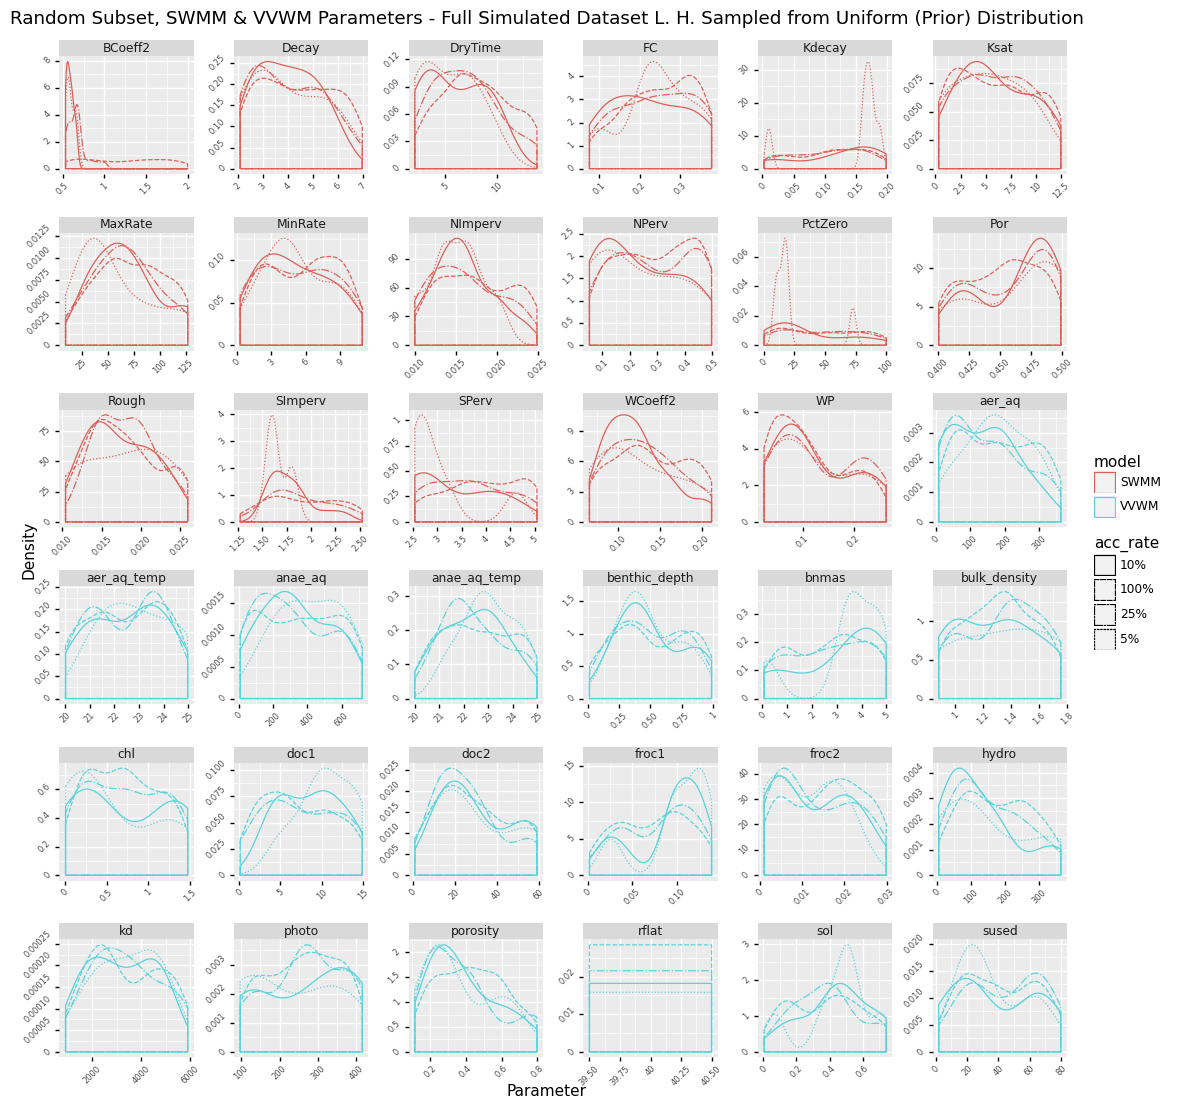

<ggplot: (142201071749)>

In [44]:
(
    p9.ggplot(sv_MULTI, p9.aes(x = "value", color = "model", linetype = "acc_rate"))
    + p9.facet_wrap("~param", scales = "free")
    + p9.geom_density()
    + p9.labs(
        x = "Parameter",  y = "Density",
        title="Random Subset, SWMM & VVWM Parameters - Full Simulated Dataset L. H. Sampled from Uniform (Prior) Distribution",
    )
    + p9.theme(subplots_adjust = {'wspace': 0.3, 'hspace': 0.5},
              axis_text = p9.element_text(angle = 45, size = 6),
              figure_size = (13,13)
              )
)


##### Seaborn

C:\ProgramData\Anaconda3\envs\epa\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
C:\ProgramData\Anaconda3\envs\epa\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
C:\ProgramData\Anaconda3\envs\epa\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
C:\ProgramData\Anaconda3\envs\epa\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.


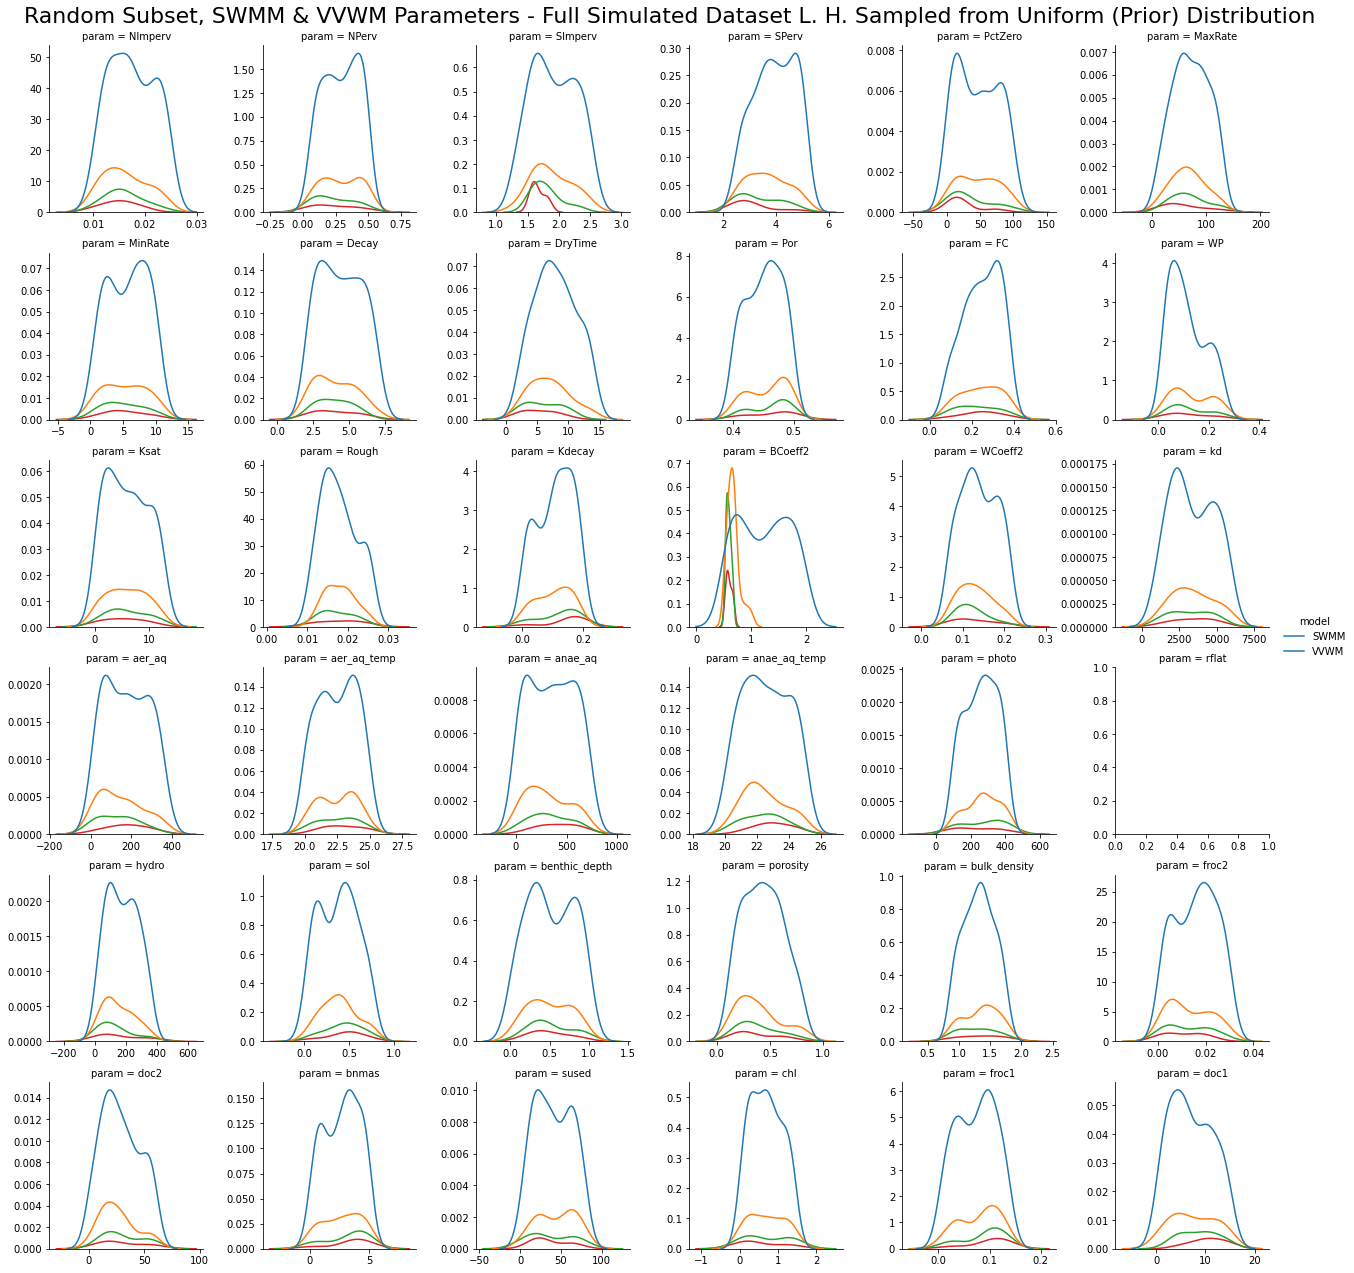

In [17]:
# Depreciated

g = sns.FacetGrid(sv_MULTI, col = "param", col_wrap = 6, sharex = False, sharey = False, hue = "model")
# key for linestyle
# sv_linestyle = [{"100%":"solid", "25%":"dashed", "10%":"dashdot", "5%":"dotted"}[x] for x in sv_MULTI.acc_rate] # Doesn't work
g.map_dataframe(sns.kdeplot, x="value", common_norm=True, hue = "acc_rate") #, linestyle = sv_linestyle) # Doesn't work
g.add_legend()
# source: <https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot>
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Random Subset, SWMM & VVWM Parameters - Full Simulated Dataset L. H. Sampled from Uniform (Prior) Distribution",
              fontsize=22)
None


#### Scatterplots

##### For SWMM and VVWM

In [62]:
sv_sctr_df = pd.concat([swmm_df, vvwm_df], axis = 1).stack().reset_index(level=[1]).assign(NSE = NSEs*36).assign(
    model = (["SWMM"]*17 + ["VVWM"]*19)*len(inputs))
sv_sctr_df.columns = ["param","value","NSE","model"]

In [48]:
from mizani.formatters import scientific_format

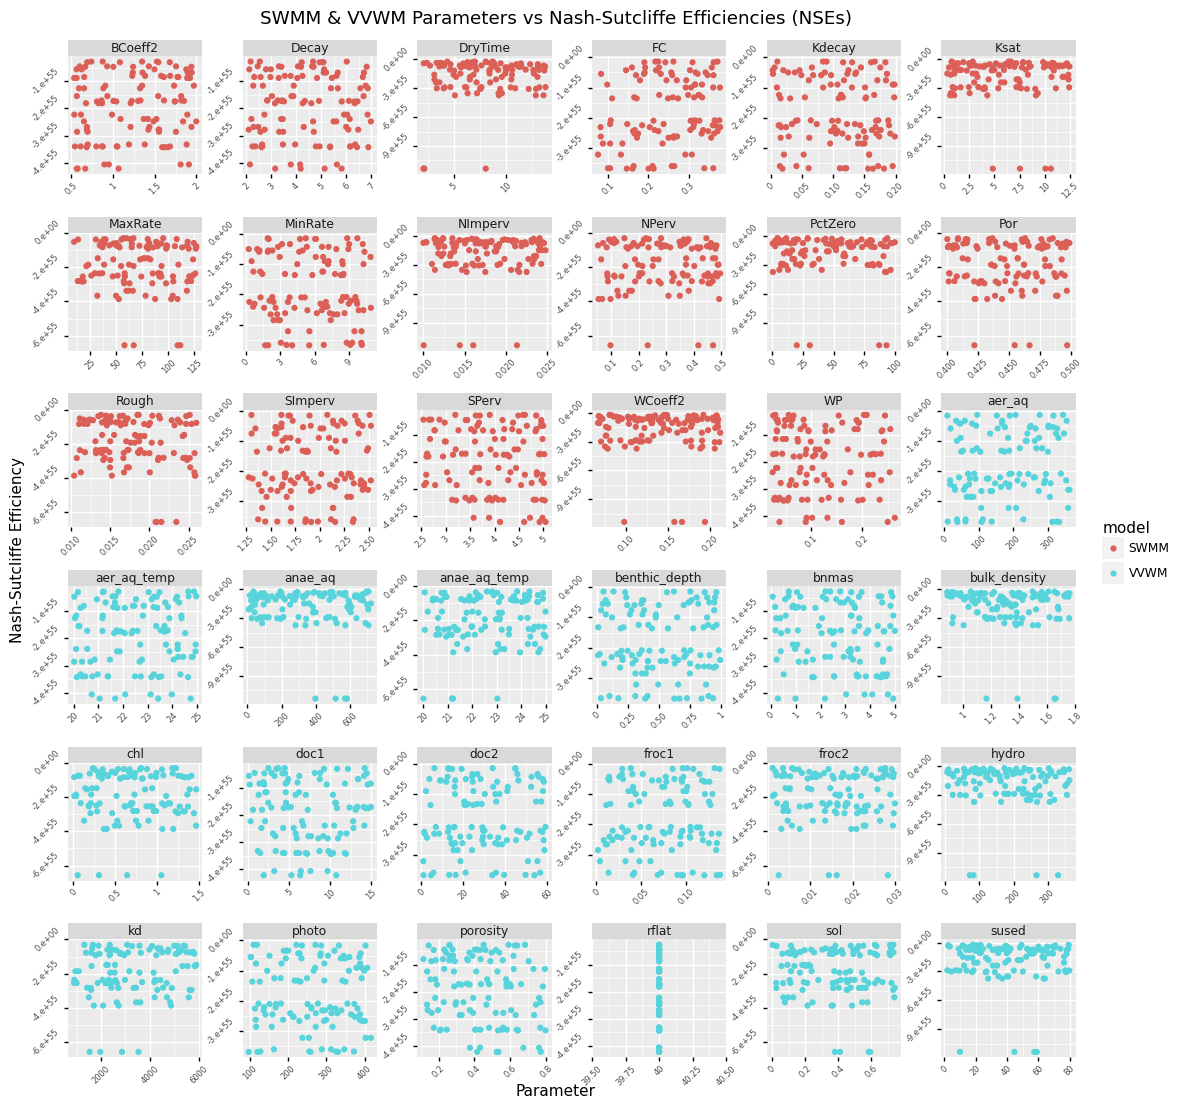

<ggplot: (142207767432)>

In [64]:
# param values vs NSEs
(
    p9.ggplot(sv_sctr_df, p9.aes(x = "value", y = "NSE", color = "model"))
    + p9.facet_wrap("~param", scales = "free")
    + p9.geom_point()
    + p9.labs(
        x = "Parameter",  y = "Nash-Sutcliffe Efficiency",
        title="SWMM & VVWM Parameters vs Nash-Sutcliffe Efficiencies (NSEs)",
    )
    + p9.theme(subplots_adjust = {'wspace': 0.3, 'hspace': 0.5},
              axis_text = p9.element_text(angle = 45, size = 6),
              figure_size = (13,13)
              )
    # can't figure out how to get zero off of the y-axis. It is screwing everything up
    + p9.scale_y_continuous(labels = scientific_format(digits = 2))
)
